__IDENTIFICAÇÃO: MARCOS AURÉLIO RAMOS MELO MATRICULA:2119177__

__IMPORTAÇÃO DAS BIBLIOTECAS__

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import sklearn.metrics as metric
from xgboost import XGBClassifier
import seaborn as sbn
from sklearn import svm

__CARREGANDO OS DADOS__

In [7]:
data = pd.read_csv("train.csv")

__Mostrando as 5 primeira linhas dos dados__

In [8]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


__MOSTRANDO QUANTIDADE DE LINHAS E COLUNAS__

In [9]:
data.shape

(252000, 13)

__VERIFICANDO DADOS VAZIOS__

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


__DESCREVENDO ALGUNS DADOS ESTATISTICOS DAS COLUNAS NUMERICAS__

In [11]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


__EXCLUINDO ALGUMAS COLUNAS__

In [12]:
data.drop(columns = ["Id","Profession","CITY","STATE"], axis  = 1, inplace = True)

__VERIFICANDO OS DADOS APOS EXCLUSÃO DAS COLUNAS__

In [13]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1


__RENOMEANDO OS NOMES DAS COLUNAS__

In [14]:
data.columns = ["Renda","Idade","Experiencia","Casado/Solteiro","Moradia","Carro","Anos no Trabalho","Tempo de Moradia","Bandeira de Risco"]

__MOSTRANDO OS DADOS APOS RENOMEAR AS COLUNAS__

In [15]:
data.head()

,Renda,Idade,Experiencia,Casado/Solteiro,Moradia,Carro,Anos no Trabalho,Tempo de Moradia,Bandeira de Risco
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1


__MOSTRANDO A DISTRIBUIÇÃO DO DADOS NAS COLUNAS NÚMERICAS__

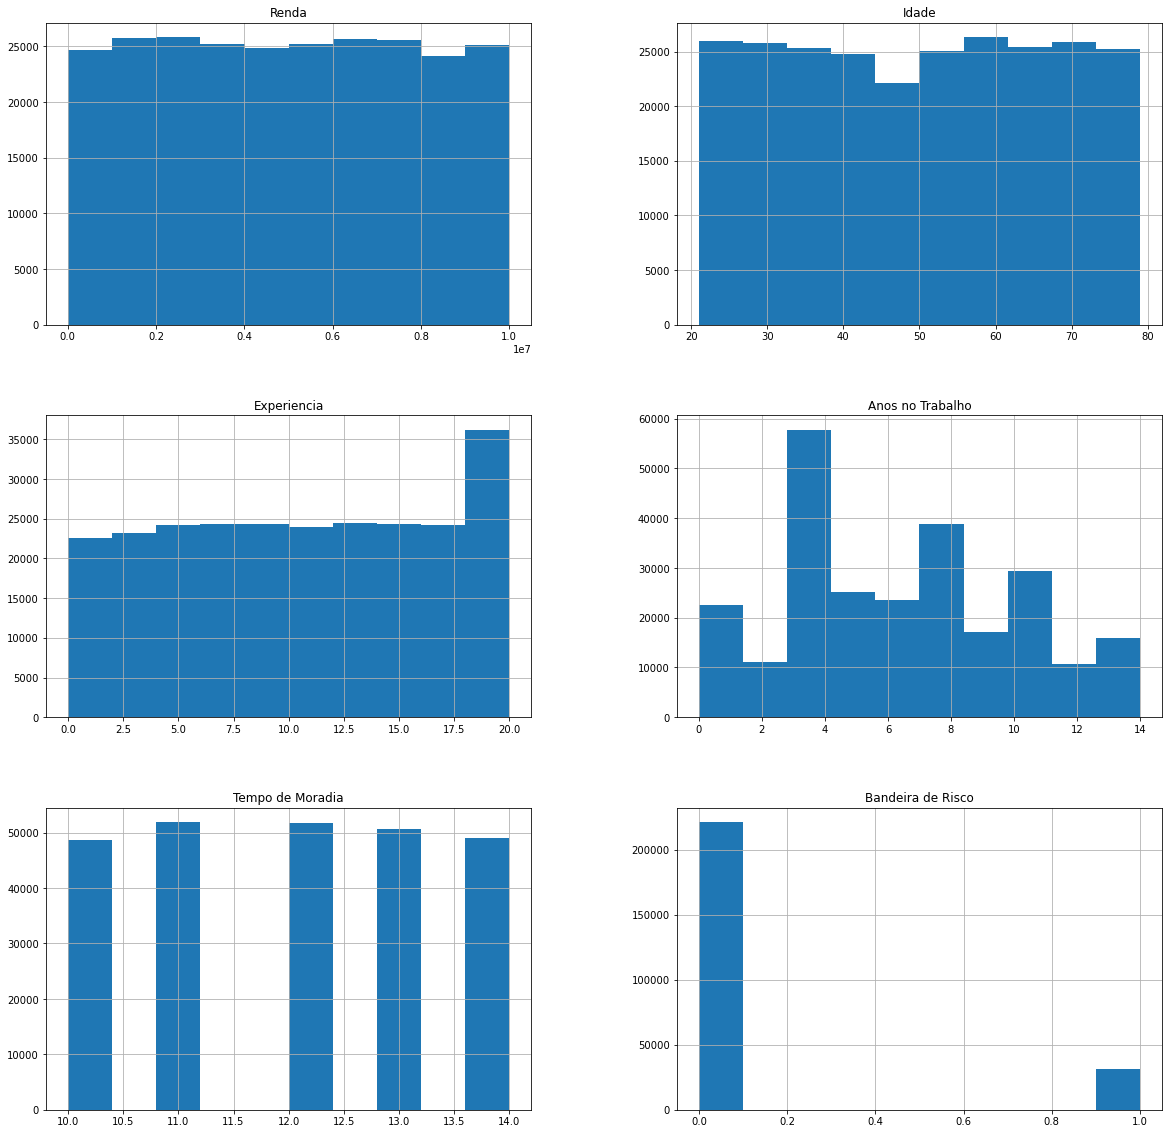

In [16]:
data.hist( figsize = (20, 20) )
plt.style.use("fivethirtyeight")

__AGRUPANDO OS DADOS E MOSTRANDO GRAFICAMENTE__

In [17]:
agp = data.groupby(["Bandeira de Risco"]).size()
agp

Bandeira de Risco
0    221004
1     30996
dtype: int64

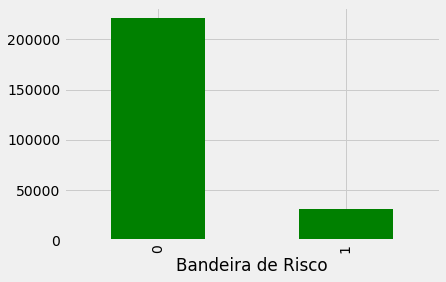

In [18]:
agp.plot.bar(color = "green")
plt.style.use("fivethirtyeight")

__VERIFICANDO OS DADOS CATEGORICOS__

In [19]:
agp = data.groupby(["Casado/Solteiro"]).size()
agp

Casado/Solteiro
married     25728
single     226272
dtype: int64

<AxesSubplot:xlabel='Casado/Solteiro'>

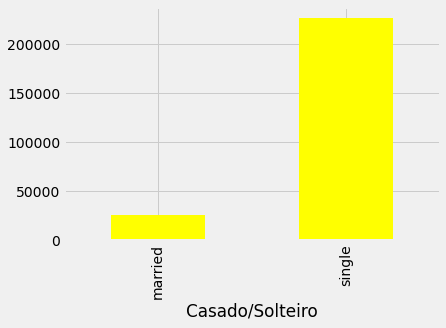

In [20]:
agp.plot.bar(color = "yellow")

In [21]:
agp = data.groupby(["Moradia"]).size()
agp

Moradia
norent_noown      7184
owned            12918
rented          231898
dtype: int64

<AxesSubplot:xlabel='Moradia'>

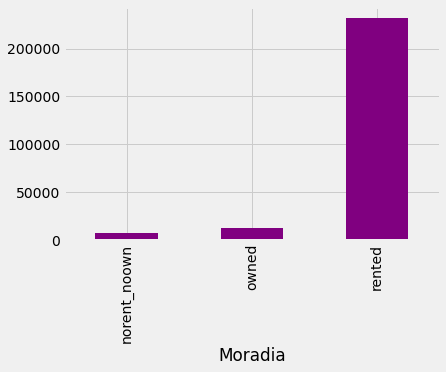

In [22]:
agp.plot.bar(color = "purple")

In [23]:
agp = data.groupby(["Carro"]).size()
agp

Carro
no     176000
yes     76000
dtype: int64

<AxesSubplot:xlabel='Carro'>

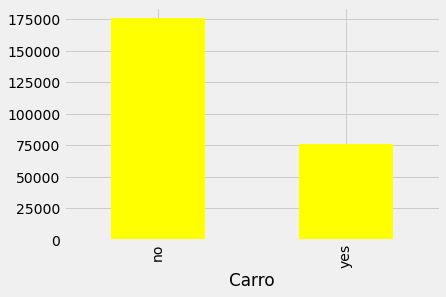

In [24]:
agp.plot.bar(color = "yellow")

([<matplotlib.patches.Wedge at 0x24d4a217700>,
 [Text(-1.0188922925859059, 0.4145581938751625, '0'),
  Text(1.018892263475599, -0.4145582654218472, '1')])

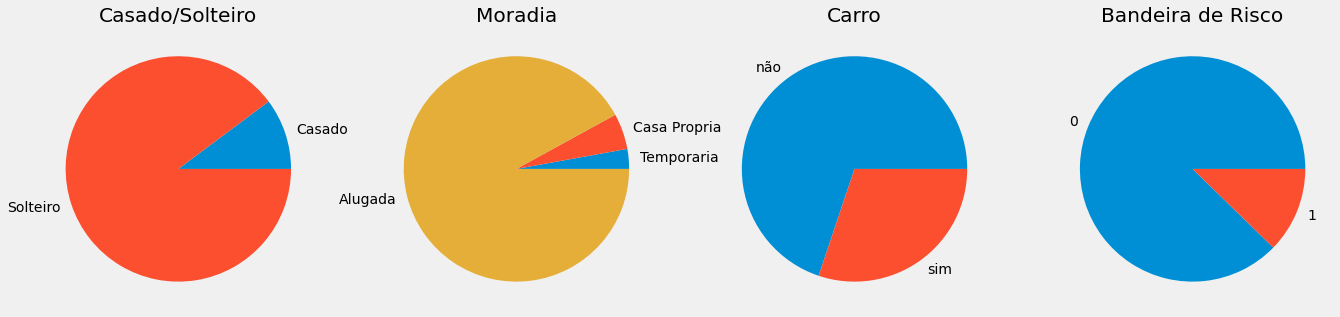

In [25]:
plt.subplot(1,4,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
label_age=['Casado','Solteiro']
plt.title("Casado/Solteiro")
plt.pie(data.groupby(data["Casado/Solteiro"]).size(),labels=label_age)

plt.subplot(1,4,2)
label_ed=['Temporaria','Casa Propria','Alugada']
plt.title("Moradia")
plt.pie(data.groupby(data["Moradia"]).size(),labels=label_ed)

plt.subplot(1,4,3)
label_car=['não','sim']
plt.title("Carro")
plt.pie(data.groupby(data["Carro"]).size(),labels=label_car)

plt.subplot(1,4,4)
plt.title("Bandeira de Risco")
label_r=[0,1]
plt.pie(data.groupby(data["Bandeira de Risco"]).size(),labels=label_r)

__TRANSFORMANDO OS DADOS CATEGORICOS__

In [26]:
label_encoder = LabelEncoder()

for col in ["Casado/Solteiro","Moradia","Carro"]:
    data[col] = label_encoder.fit_transform( data[col] )

__MOSTRANDO OS DADOS__

In [27]:
data.head()

,Renda,Idade,Experiencia,Casado/Solteiro,Moradia,Carro,Anos no Trabalho,Tempo de Moradia,Bandeira de Risco
0,1303834,23,3,1,2,0,3,13,0
1,7574516,40,10,1,2,0,9,13,0
2,3991815,66,4,0,2,0,4,10,0
3,6256451,41,2,1,2,1,2,12,1
4,5768871,47,11,1,2,0,3,14,1


__DIVIDINDO OS DADOS EM TREINO E TESTE__

In [28]:
x = data.drop("Bandeira de Risco", axis=1)
y = data["Bandeira de Risco"]

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, stratify = y, random_state = 1)

__USANDO CLASSIFICADOR__

In [30]:
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)

__MELHORANDO O MODELO E USANDO O PRIMEIRO CLASSIFICADOR RANDOMFOREST__

In [31]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1)

In [32]:
y_pred = model.predict(x_test)

__VERIFICANDO A ACURACIA DO MODELO__

In [33]:
accuracy_score(y_test, y_pred)

0.876996151996152

__USANDO O SEGUNDO CLASSIFICADOR PARA AVALIAR O MODELO DecisionTreeClassifier__

In [67]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, random_state = 21, test_size = 0.2)

In [68]:
model = DecisionTreeClassifier()

In [69]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [70]:
pred1 = data.predict(x_validation)

In [71]:
accuracy_score(y_validation, pred1)


0.8833730158730159

__USANDO O TERCEIRO CLASSIFICADOR__